<a href="https://colab.research.google.com/github/anggara23-dotcom/ProjectML/blob/main/ProjectSKPI_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset from url
url = 'https://raw.githubusercontent.com/diazzzz/Buku-Machine-Learning/refs/heads/main/data_car.csv'
df = pd.read_csv(url)

# menampilkan 5 data teratas
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.count()

,0
Make,11914
Model,11914
Year,11914
Engine Fuel Type,11911
Engine HP,11845
Engine Cylinders,11884
Transmission Type,11914
Driven_Wheels,11914
Number of Doors,11908
Market Category,8172


In [7]:
#Menampilkan tipe data dari seluruh fitur
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [8]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [10]:

df.shape

(11914, 16)

In [11]:
# backup data ke df_original
df_original = df.copy()

# menghitung data duplikat menjadi variabel duplikat_rows_df
duplikat_rows_df = df[df.duplicated()]
print('jumlah data duplikat:', duplikat_rows_df.shape)


jumlah data duplikat: (715, 16)


In [12]:
print(duplikat_rows_df.head)

<bound method NDFrame.head of          Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14          

In [13]:
# drop data duplikat
df = df.drop_duplicates()
df.shape

(11199, 16)

In [14]:
# menampilkan data missing value
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3376


In [15]:
# menghapus data yang missing value
df = df.dropna()
df.shape

(7735, 16)

In [16]:
#cek missing value setelah di hapus
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [17]:
# memilih fitur
print(df.columns)

df = df.drop(['Engine Fuel Type','Market Category','Number of Doors','Engine HP'], axis=1)
df.head()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


Text(0.5, 0, 'Merk')

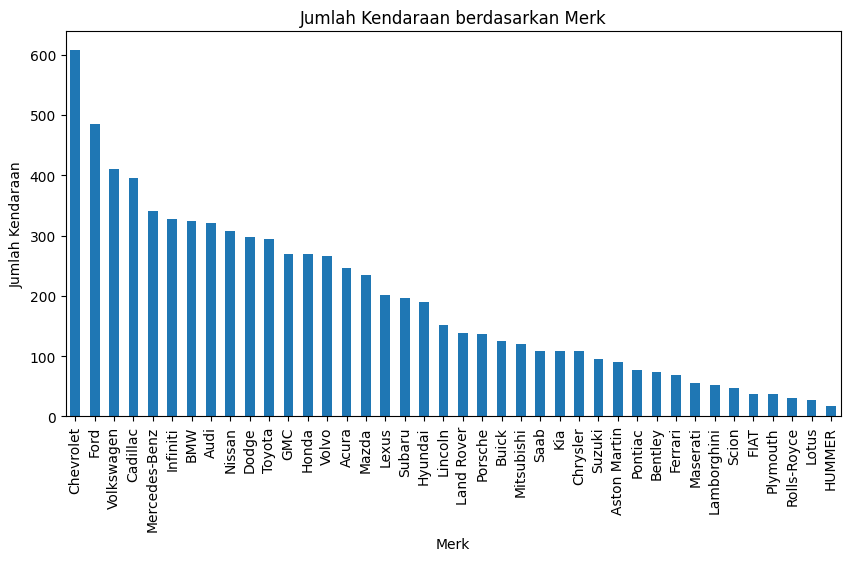

In [18]:
# membuat histogram dari feature Make
df['Make'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Jumlah Kendaraan berdasarkan Merk')
plt.ylabel('Jumlah Kendaraan')
plt.xlabel('Merk')

<Axes: >

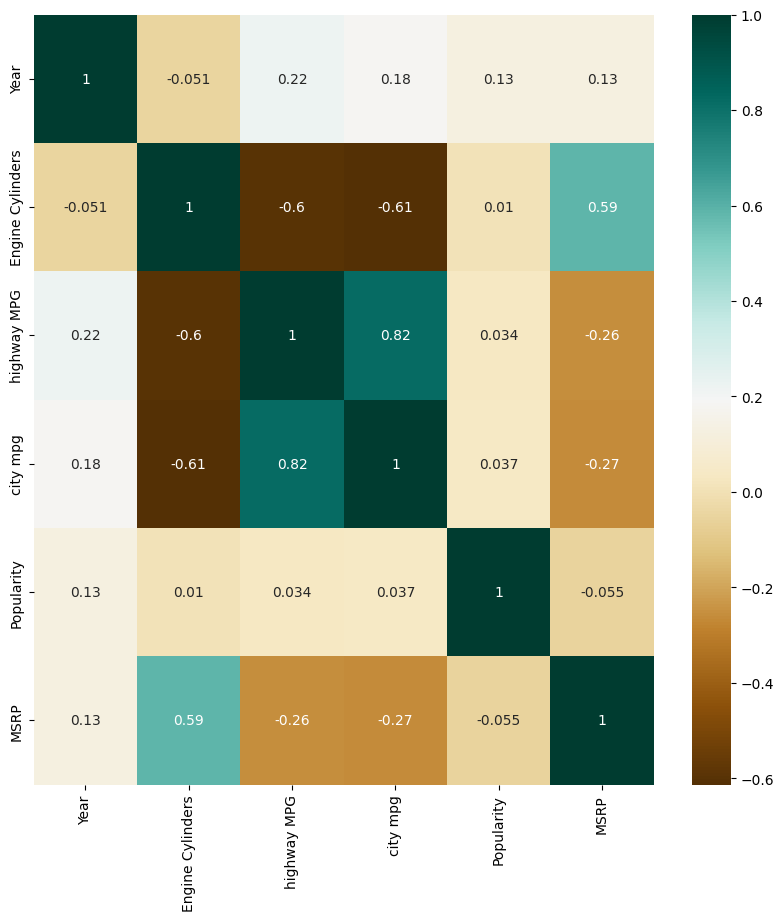

In [19]:
# memilih fitur dengan type int dan float untuk di jadikan heatmap
df_heatmap = df.select_dtypes(include=['int64', 'float64'])
df_heatmap.head(5)
# membuat heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='BrBG')


<Figure size 1200x600 with 0 Axes>

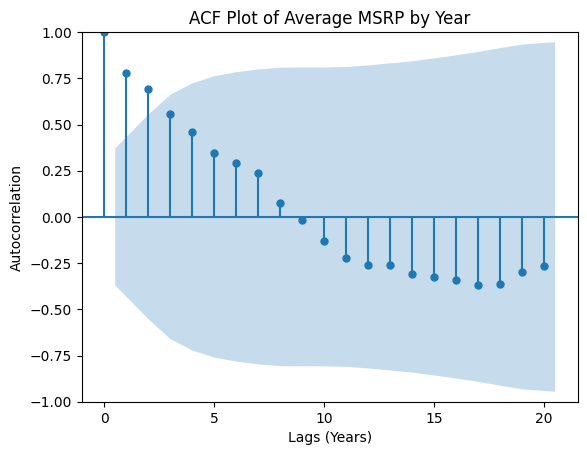

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Calculate the mean MSRP for each year
msrp_by_year = df.groupby('Year')['MSRP'].mean()

# Create the ACF plot
plt.figure(figsize=(12, 6))
plot_acf(msrp_by_year, lags=20) # You can adjust the number of lags as needed
plt.title('ACF Plot of Average MSRP by Year')
plt.xlabel('Lags (Years)')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

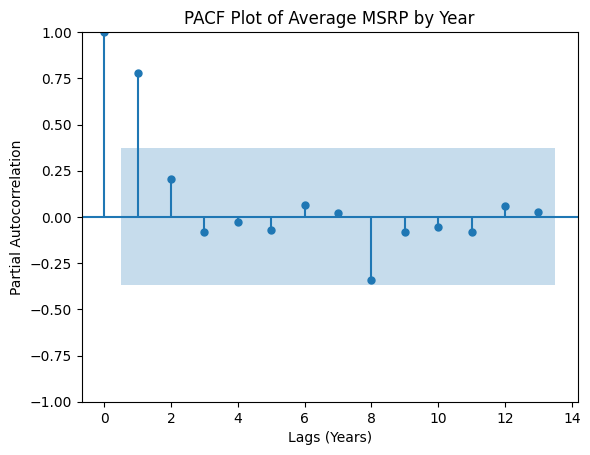

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Create the PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(msrp_by_year, lags=13) # Mengurangi jumlah lag sesuai batasan
plt.title('PACF Plot of Average MSRP by Year')
plt.xlabel('Lags (Years)')
plt.ylabel('Partial Autocorrelation')
plt.show()